#Importing Important Modules

In [ ]:
!pip install mne
!pip install pymatreader
!pip install --upgrade yasa
!pip install mat73
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from mat73 import loadmat

import pickle

from sklearn.utils import shuffle
from scipy import signal
from scipy.fft import fftshift
from mne.time_frequency import psd_array_multitaper
from scipy.integrate import simps
from yasa import sliding_window

import tensorflow as tf
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations

Connecting to the google drive using authentication procees and getting the raw data from the drive.

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
cd /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy

/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy


In [ ]:
ls


sub-hc10_ses-hc_task-rest_eeg.bdf   sub-pd14_ses-on_task-rest_eeg.bdf
sub-hc18_ses-hc_task-rest_eeg.bdf   sub-pd16_ses-off_task-rest_eeg.bdf
sub-hc1_ses-hc_task-rest_eeg.bdf    sub-pd16_ses-on_task-rest_eeg.bdf
sub-hc20_ses-hc_task-rest_eeg.bdf   sub-pd17_ses-off_task-rest_eeg.bdf
sub-hc21_ses-hc_task-rest_eeg.bdf   sub-pd17_ses-on_task-rest_eeg.bdf
sub-hc24_ses-hc_task-rest_eeg.bdf   sub-pd19_ses-off_task-rest_eeg.bdf
sub-hc25_ses-hc_task-rest_eeg.bdf   sub-pd19_ses-on_task-rest_eeg.bdf
sub-hc29_ses-hc_task-rest_eeg.bdf   sub-pd22_ses-off_task-rest_eeg.bdf
sub-hc2_ses-hc_task-rest_eeg.bdf    sub-pd22_ses-on_task-rest_eeg.bdf
sub-hc30_ses-hc_task-rest_eeg.bdf   sub-pd23_ses-off_task-rest_eeg.bdf
sub-hc31_ses-hc_task-rest_eeg.bdf   sub-pd23_ses-on_task-rest_eeg.bdf
sub-hc32_ses-hc_task-rest_eeg.bdf   sub-pd26_ses-off_task-rest_eeg.bdf
sub-hc33_ses-hc_task-rest_eeg.bdf   sub-pd26_ses-on_task-rest_eeg.bdf
sub-hc4_ses-hc_task-rest_eeg.bdf    sub-pd28_ses-off_task-rest_eeg.bdf
sub-hc7_ses-h

In [ ]:
os.chdir("/content/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy")
os.getcwd()

OSError: ignored

In [ ]:
raw_data = glob.glob('*.bdf')
raw_data.sort()
len(raw_data), raw_data

(46,
 ['sub-hc10_ses-hc_task-rest_eeg.bdf',
  'sub-hc18_ses-hc_task-rest_eeg.bdf',
  'sub-hc1_ses-hc_task-rest_eeg.bdf',
  'sub-hc20_ses-hc_task-rest_eeg.bdf',
  'sub-hc21_ses-hc_task-rest_eeg.bdf',
  'sub-hc24_ses-hc_task-rest_eeg.bdf',
  'sub-hc25_ses-hc_task-rest_eeg.bdf',
  'sub-hc29_ses-hc_task-rest_eeg.bdf',
  'sub-hc2_ses-hc_task-rest_eeg.bdf',
  'sub-hc30_ses-hc_task-rest_eeg.bdf',
  'sub-hc31_ses-hc_task-rest_eeg.bdf',
  'sub-hc32_ses-hc_task-rest_eeg.bdf',
  'sub-hc33_ses-hc_task-rest_eeg.bdf',
  'sub-hc4_ses-hc_task-rest_eeg.bdf',
  'sub-hc7_ses-hc_task-rest_eeg.bdf',
  'sub-hc8_ses-hc_task-rest_eeg.bdf',
  'sub-pd11_ses-off_task-rest_eeg.bdf',
  'sub-pd11_ses-on_task-rest_eeg.bdf',
  'sub-pd12_ses-off_task-rest_eeg.bdf',
  'sub-pd12_ses-on_task-rest_eeg.bdf',
  'sub-pd13_ses-off_task-rest_eeg.bdf',
  'sub-pd13_ses-on_task-rest_eeg.bdf',
  'sub-pd14_ses-off_task-rest_eeg.bdf',
  'sub-pd14_ses-on_task-rest_eeg.bdf',
  'sub-pd16_ses-off_task-rest_eeg.bdf',
  'sub-pd16_ses-on_t

#Data Pre-Processing

In this module data is processed and appened to a list called raw_all

In [ ]:
%%capture
raw_list = []
for raw_data in raw_data:
    raw = mne.io.read_raw_bdf(raw_data, preload=True)
    raw.set_eeg_reference()
    raw.filter(l_freq=0.5, h_freq =50)
    events = mne.make_fixed_length_events(raw, duration=1.0)
    epochs = mne.Epochs(raw, events=events, tmin=0.0, tmax=1.0, baseline=None)
    ica = mne.preprocessing.ICA(n_components=20, random_state=42)
    ica.fit(raw)
    ica.apply(raw)
    raw_list.append(raw)

# concatenate the raw data from all files
raw_all = mne.concatenate_raws(raw_list)

In [ ]:
epochs

Number of events,187
Events,1: 187
Time range,0.000 – 1.000 sec
Baseline,off


In [ ]:
raw_all


<RawEDF | sub-hc10_ses-hc_task-rest_eeg.bdf, 41 x 4640768 (9064.0 s), ~1.42 GB, data loaded>

Saving the processed data to a file

In [ ]:
raw_all.save('processed_data.fif')

Writing /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/processed_data.fif


<ipython-input-15-302cc9e74a26>:1: RuntimeWarning: This filename (/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/processed_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_all.save('processed_data.fif')


Closing /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/processed_data.fif
[done]


#Data Visualization

Using matplotlib as 2D backend.


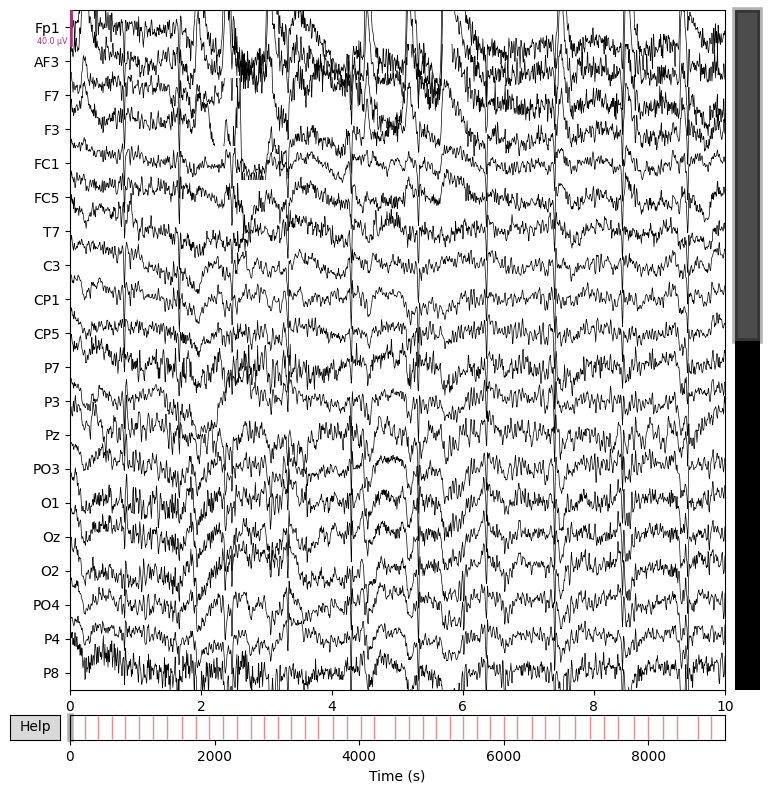

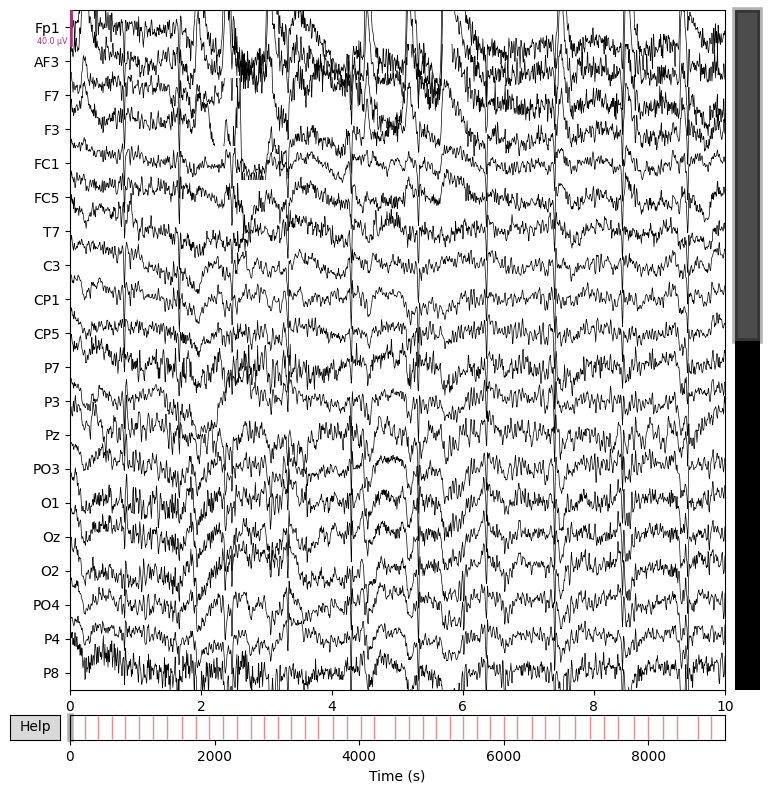

In [ ]:
raw_all.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


<ipython-input-17-3a26be675050>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_all.plot_psd()


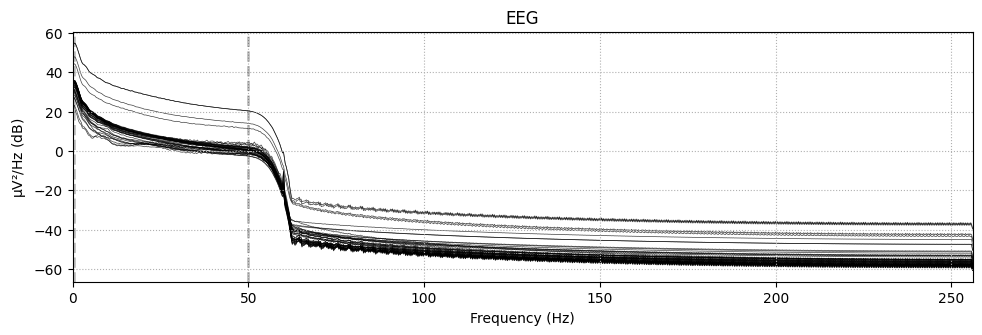

In [ ]:
raw_all.plot_psd()

#Converting to a dataframe

Processed data is then converted to a panadas dataframe.

In [ ]:
raw_df = raw_all.to_data_frame()

In [ ]:
raw_df.shape

(4640768, 42)

In [ ]:
raw_df

,time,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,...,Cz,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Status
0,0.000000,2.297020e-14,-4.400163e-13,-5.470232e-13,1.718097e-13,-2.177603e-14,-2.059357e-14,5.067025e-14,-1.955804e-13,-1.180120e-14,...,-1.235899e-13,2.710296e-13,-2.370777e-13,2.191652e-14,1.899432e-13,-1.860094e-13,-1.427009e-12,-1.667154e-14,1.645612e-13,65536.0
1,0.001953,5.157655e+00,2.960146e-01,6.383486e+00,7.715111e+00,4.450812e+00,6.881085e+00,1.165172e+01,1.041788e+01,7.416763e+00,...,4.837304e+00,3.353992e+00,-4.728432e+00,-2.502485e+00,1.134594e+00,-9.975094e+01,-9.900661e+01,4.939284e-01,-4.063535e-01,65536.0
2,0.003906,9.005760e+00,2.215067e+00,1.224277e+01,1.479699e+01,8.755862e+00,1.294874e+01,2.164496e+01,1.937184e+01,1.418274e+01,...,9.437511e+00,6.639152e+00,-7.077249e+00,-4.426161e+00,2.815976e+00,-1.949822e+02,-1.934415e+02,9.019929e-01,-7.753405e-01,65536.0
3,0.005859,1.064827e+01,6.726647e+00,1.719619e+01,2.079928e+01,1.279611e+01,1.765306e+01,2.884299e+01,2.584388e+01,1.978755e+01,...,1.360714e+01,9.784183e+00,-5.514319e+00,-5.227744e+00,5.393489e+00,-2.814731e+02,-2.790774e+02,8.479233e-01,-1.367495e+00,65536.0
4,0.007812,9.880194e+00,1.376199e+01,2.107326e+01,2.555921e+01,1.649132e+01,2.085585e+01,3.295066e+01,2.953929e+01,2.396167e+01,...,1.722545e+01,1.272343e+01,1.463909e-01,-4.525539e+00,8.872119e+00,-3.556091e+02,-3.523622e+02,-4.274173e-01,-2.842605e+00,65536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640763,9063.990234,1.275216e+01,-1.195427e+01,-1.661698e+01,-2.125263e+01,-2.363053e+01,-2.033985e+01,-2.560129e+00,-2.310461e+01,-2.170174e+01,...,-1.450254e+01,-2.188656e+01,1.041905e+01,-3.869897e+01,2.009560e+01,1.487906e+02,1.510390e+02,-1.423276e+00,-6.032865e+00,0.0
4640764,9063.992188,2.496711e+01,-7.033553e+00,-1.518277e+01,-1.907987e+01,-2.103415e+01,-1.751259e+01,2.083918e+00,-1.996254e+01,-1.896047e+01,...,-1.253309e+01,-2.032259e+01,6.554042e+00,-2.372562e+01,1.696559e+01,1.121950e+02,1.143914e+02,6.905034e+00,1.926441e+00,0.0
4640765,9063.994141,2.616827e+01,-3.343038e+00,-1.160557e+01,-1.447957e+01,-1.592461e+01,-1.291776e+01,3.678563e+00,-1.475983e+01,-1.411485e+01,...,-9.282977e+00,-1.571687e+01,3.508038e+00,-1.135449e+01,1.222196e+01,7.438770e+01,7.615008e+01,9.275934e+00,5.042349e+00,0.0
4640766,9063.996094,1.644580e+01,-1.166709e+00,-6.289279e+00,-7.826511e+00,-8.606982e+00,-6.870641e+00,2.606811e+00,-7.859737e+00,-7.542854e+00,...,-4.950457e+00,-8.575129e+00,1.434554e+00,-3.866394e+00,6.379131e+00,3.690477e+01,3.788836e+01,6.237458e+00,3.802481e+00,0.0


In [ ]:
raw_df.to_csv('dataframe_raw_df.csv')